In [15]:
# csv file
#datafile = "deep1B_f2_apu-3_cpu-512GB_gpu-GEFORCERTXTI.csv"
#datafile = "deep1B_results_1628703727.8284457.csv"

datafiles= {"107":"deep1B_results_1628820264.4167612.csv", "32": "deep1B_results_1628734717.1272287.csv" }

In [16]:
import pandas as pd

total_df = []
for key in datafiles.keys():
    csv_file = datafiles[key]
    df = pd.read_csv(csv_file)
    total_df.append(df)
#    print(df)
 
df = pd.concat(total_df)
print(df)
    

   device  query_set_size   k  params    latency   recall
0     gpu           10000  10       1   0.241693  0.23900
1     gpu           10000  10       2   0.254268  0.34045
2     gpu           10000  10       4   0.298922  0.45774
3     gpu           10000  10      16   0.552873  0.69026
4     gpu           10000  10      32   0.868559  0.78701
5     gpu           10000  10      64   1.543602  0.86323
6     gpu           10000  10     128   2.878527  0.91557
7     gpu           10000  10     140   3.158505  0.92046
8     gpu           10000  10     160   3.659733  0.92782
9     gpu           10000  10     180   3.925385  0.93298
10    gpu           10000  10     200   4.312826  0.93797
11    gpu           10000  10     220   4.820023  0.94177
12    gpu           10000  10     240   5.062057  0.94516
13    gpu           10000  10     256   5.374245  0.94746
14    cpu           10000  10       1   5.150194  0.23900
15    cpu           10000  10       2   4.935254  0.34045
16    cpu     

In [18]:
#import pandas as pd
#df = pd.read_csv(datafile)

apu = df[ df['device']=='apu'] 
apu__qs_10000 = apu[ apu['query_set_size']==10000 ] 
apu__qs_10000__k_10 = apu__qs_10000[ apu__qs_10000['k']==10 ]
print(apu__qs_10000__k_10)

cpu = df[ df['device']=='cpu'] 
cpu__qs_10000 = cpu[ cpu['query_set_size']==10000 ] 
cpu__qs_10000__k_10 = cpu__qs_10000[ cpu__qs_10000['k']==10 ]
print(cpu__qs_10000__k_10)

gpu = df[ df['device']=='gpu'] 
gpu__qs_10000 = gpu[ gpu['query_set_size']==10000 ] 
gpu__qs_10000__k_10 = gpu__qs_10000[ gpu__qs_10000['k']==10 ]
print(gpu__qs_10000__k_10)

  device  query_set_size   k  params  latency  recall
0    apu           10000  10      -1  83.3256  0.9419
   device  query_set_size   k  params    latency   recall
14    cpu           10000  10       1   5.150194  0.23900
15    cpu           10000  10       2   4.935254  0.34045
16    cpu           10000  10       4   5.231673  0.45774
17    cpu           10000  10      16   5.456320  0.69026
18    cpu           10000  10      32   5.787342  0.78701
19    cpu           10000  10      64   6.481110  0.86323
20    cpu           10000  10     128   7.223070  0.91557
21    cpu           10000  10     140   7.563591  0.92046
22    cpu           10000  10     160   7.967562  0.92782
23    cpu           10000  10     180   8.436838  0.93298
24    cpu           10000  10     200   8.939677  0.93797
25    cpu           10000  10     220   9.369806  0.94177
26    cpu           10000  10     240   9.741236  0.94516
27    cpu           10000  10     256  10.178229  0.94746
   device  query_set_s

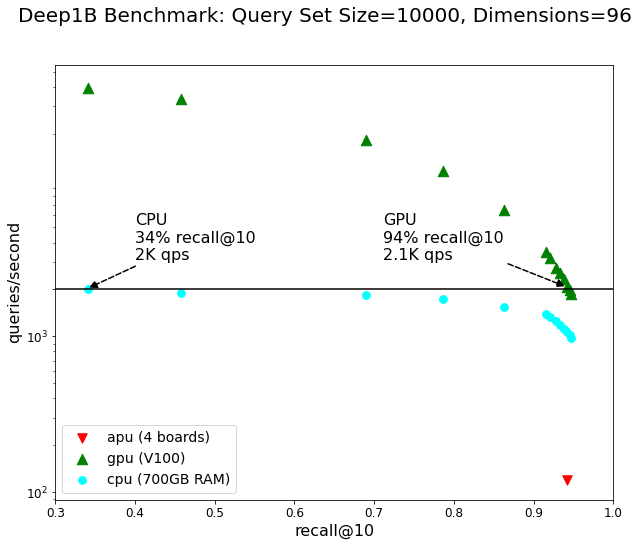

In [60]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('axes', labelsize=16, titlesize=16)
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["figure.titlesize"] = 14
plt.rcParams["figure.titleweight"] = 'roman'
#print(plt.rcParams.keys())

apu_latency = apu__qs_10000__k_10['latency'].tolist()
apu_qps = [ 10000/l for l in apu_latency]
apu_recall = apu__qs_10000__k_10['recall'].tolist()

cpu_latency = cpu__qs_10000__k_10['latency'].tolist()
cpu_qps = [ 10000/l for l in cpu_latency]
cpu_recall = cpu__qs_10000__k_10['recall'].tolist()

gpu_latency = gpu__qs_10000__k_10['latency'].tolist()
gpu_qps = [ 10000/l for l in gpu_latency]
gpu_recall = gpu__qs_10000__k_10['recall'].tolist()


fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter( apu_recall, apu_qps, 
             marker = 'v', s=90,
                 color=['red' for i in range(len(apu_latency))])
ax.scatter( gpu_recall, gpu_qps, 
             marker = '^', s=110,
                color=['green' for i in range(len(apu_latency))])
ax.scatter( cpu_recall, cpu_qps, 
            marker = 'o', s=60,
                color=['cyan' for i in range(len(apu_latency))])
ax.hlines(2000,xmin=0.3,xmax=1.0,colors=['black'])

ax.set_yscale('log')
ax.set_yticks([100, 1000,2000])
ax.set_ylabel('queries/second')
ax.set_xlim([0.3, 1.0])
ax.set_xlabel('recall@10')

#gpu
ax.annotate('GPU\n94% recall@10\n2.1K qps', xy=(0.9417, 2074.7),
             xycoords='data',
             xytext=(0.7117, 3074.7),
             textcoords='data',
             size=16,
             arrowprops=dict(arrowstyle= '-|>',
                             color='black',
                             lw=1.5,
                             ls='--')
           )

#cpu
ax.annotate('CPU\n34% recall@10\n2K qps', xy=(0.34, 2026),
             xycoords='data',
             xytext=(0.4, 3074.7),
             textcoords='data',
             size=16,
             arrowprops=dict(arrowstyle= '-|>',
                             color='black',
                             lw=1.5,
                             ls='--')
           )

#RTX2080TI
plt.legend(['apu (4 boards)','gpu (V100)', 'cpu (700GB RAM)'],fontsize=14,loc="lower left")

plt.suptitle('Deep1B Benchmark: Query Set Size=10000, Dimensions=96', fontsize=20)
#plt.show()

# text
#

#fig = plt.gcf()
fig.patch.set_alpha(1)
fig.savefig("deep1B_compare.png",facecolor=fig.get_facecolor(), edgecolor='none', transparent=False)

In [20]:
for el in zip(gpu_latency, gpu_qps): print(el)

(0.2416934967041015, 41374.716888815245)
(0.254267930984497, 39328.59311546335)
(0.2989215850830078, 33453.589499811766)
(0.5528726577758789, 18087.347709015765)
(0.8685593605041504, 11513.317862575974)
(1.5436017513275146, 6478.354919848911)
(2.8785269260406494, 3473.9991172341684)
(3.1585047245025635, 3166.055102727418)
(3.659733057022095, 2732.4397283054695)
(3.925385236740112, 2547.5206627884077)
(4.31282639503479, 2318.665089675916)
(4.8200225830078125, 2074.6790762461023)
(5.062057495117188, 1975.481315580849)
(5.374245405197144, 1860.7263431494096)


In [54]:
for el in zip(cpu_latency, cpu_qps): print(el)

(5.150194406509399, 1941.6742768701831)
(4.935253620147705, 2026.238319176941)
(5.231672763824463, 1911.4345356512301)
(5.45632004737854, 1832.7370669549427)
(5.787341833114624, 1727.9089931721232)
(6.481110095977783, 1542.9455528314604)
(7.22307014465332, 1384.4528434217443)
(7.563591003417969, 1322.1233135796242)
(7.967561721801758, 1255.0891162395205)
(8.436838150024414, 1185.278160156606)
(8.939676761627197, 1118.608677544601)
(9.369805812835692, 1067.2579773532773)
(9.741235733032228, 1026.5638029978384)
(10.178229331970217, 982.4891613111535)
